# Свойства пределов: внесение предела в функцию

## Вопрос: Почему можно вносить предел в степень?

$$
\lim_{x \to a} (f(x))^n = \left(\lim_{x \to a} f(x)\right)^n
$$

Это важное свойство пределов, которое часто используется, но редко объясняется. Давайте разберемся!


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Настройка для Retina дисплеев
%config InlineBackend.figure_format = 'retina'


## Теорема о пределе композиции (сложной функции)

### Формулировка

**Теорема.** Если:
1. $\lim_{x \to a} f(x) = L$ (предел $f$ существует и равен $L$)
2. Функция $g(y)$ **непрерывна** в точке $y = L$

То:
$$
\lim_{x \to a} g(f(x)) = g\left(\lim_{x \to a} f(x)\right) = g(L)
$$

---

### 📐 Доказательство

**Дано:**
1. $\lim_{x \to a} f(x) = L$
2. $g$ непрерывна в точке $L$, т.е. $\lim_{y \to L} g(y) = g(L)$

**Требуется доказать:** $\lim_{x \to a} g(f(x)) = g(L)$

---

**Ход доказательства:**

1. Так как $g$ непрерывна в точке $L$, то по определению непрерывности:
   $$
   \forall \varepsilon > 0 \ \exists \eta > 0: \ |y - L| < \eta \Rightarrow |g(y) - g(L)| < \varepsilon
   $$

2. Зафиксируем произвольное $\varepsilon > 0$. По условию непрерывности $g$ найдется такое $\eta > 0$, что:
   $$
   |y - L| < \eta \Rightarrow |g(y) - g(L)| < \varepsilon \quad (*)
   $$

3. Так как $\lim_{x \to a} f(x) = L$, то по определению предела:
   $$
   \forall \eta > 0 \ \exists \delta > 0: \ 0 < |x - a| < \delta \Rightarrow |f(x) - L| < \eta
   $$

4. Применим это для нашего $\eta$ из шага 2. Найдется $\delta > 0$ такое, что:
   $$
   0 < |x - a| < \delta \Rightarrow |f(x) - L| < \eta \quad (**)
   $$

5. Объединяем $(**)$ и $(*)$:
   
   Если $0 < |x - a| < \delta$, то:
   - По $(**):$ $|f(x) - L| < \eta$
   - Обозначим $y = f(x)$, тогда $|y - L| < \eta$
   - По $(*):$ $|g(y) - g(L)| < \varepsilon$
   - Значит, $|g(f(x)) - g(L)| < \varepsilon$

6. Итак, мы показали:
   $$
   \forall \varepsilon > 0 \ \exists \delta > 0: \ 0 < |x-a| < \delta \Rightarrow |g(f(x)) - g(L)| < \varepsilon
   $$
   
   Это и есть определение $\lim_{x \to a} g(f(x)) = g(L)$

**Теорема доказана.** ∎

---

### 🔑 Ключевая идея доказательства

**"Цепочка переходов через $\eta$":**

$$
\varepsilon \xrightarrow{\text{непрерывность } g} \eta \xrightarrow{\text{предел } f} \delta
$$

1. Задано $\varepsilon$ (для близости $g(f(x))$ к $g(L)$)
2. Непрерывность $g$ дает $\eta$ (для близости $f(x)$ к $L$)
3. Предел $f$ дает $\delta$ (для близости $x$ к $a$)

Непрерывность $g$ — критически важна для существования $\eta$!


## 🎨 Геометрический смысл композиции

### Что такое композиция функций?

Композиция $g(f(x))$ — это **двухэтапное преобразование**:

1. **Шаг 1:** $x \xrightarrow{f} y = f(x)$ — внутренняя функция преобразует $x$ в $y$
2. **Шаг 2:** $y \xrightarrow{g} z = g(y)$ — внешняя функция преобразует $y$ в $z$

**Итого:** $x \xrightarrow{g \circ f} z = g(f(x))$

### Ключевой момент

Выход внутренней функции ($y = f(x)$) становится **входом** внешней функции ($g(y)$)!

На графиках:
- **График $f$:** горизонтальная ось — $x$, вертикальная — $y = f(x)$
- **График $g$:** горизонтальная ось — $y$, вертикальная — $z = g(y)$
- **График композиции:** горизонтальная ось — $x$, вертикальная — $z = g(f(x))$

**Важно:** То, что на первом графике по **вертикали** (значение $f$), на втором графике становится по **горизонтали** (аргумент $g$)!


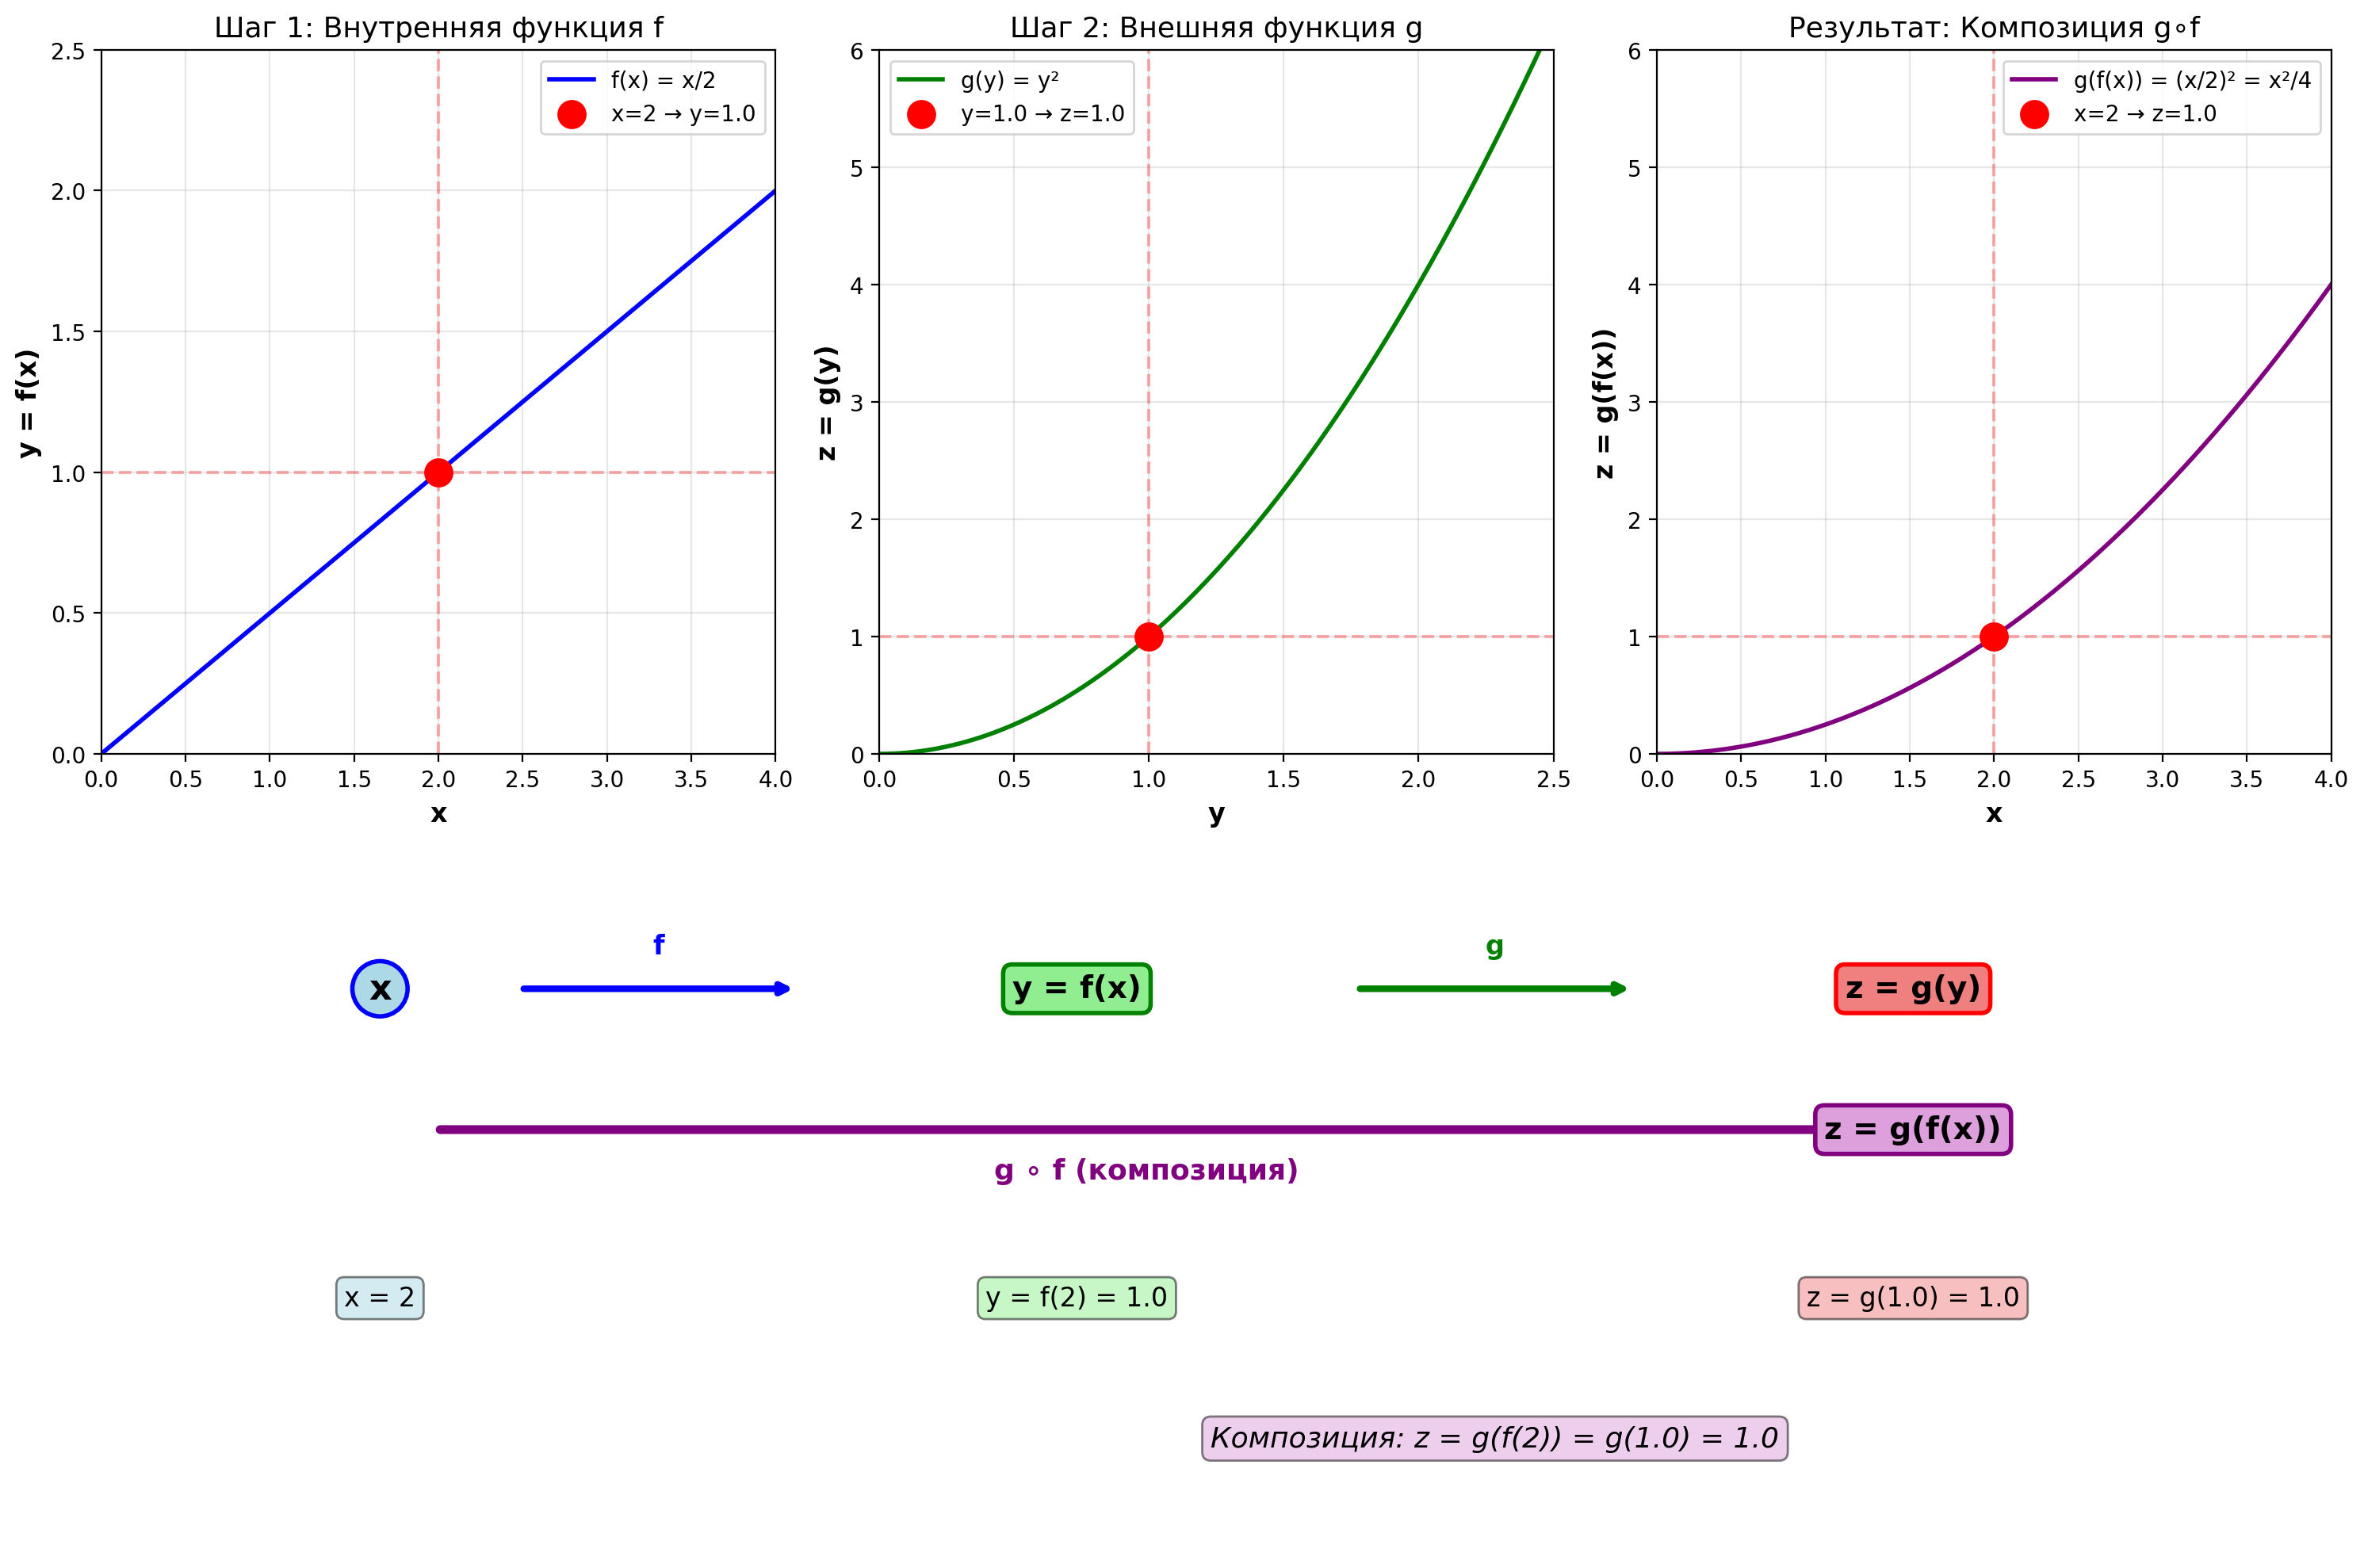

Геометрический смысл композиции:
1. На графике f: значение f(x) откладывается по ВЕРТИКАЛЬНОЙ оси (y)
2. На графике g: это же значение y используется по ГОРИЗОНТАЛЬНОЙ оси!
3. Результат g(y) снова по вертикальной оси

Цепочка преобразований:
  x = 2 → f(2) = 1.0 → g(1.0) = 1.0

Это и есть композиция: g(f(x)) = результат двухэтапного преобразования!


In [29]:
# Визуализация композиции: цепочка преобразований

# Пример: f(x) = x/2, g(y) = y^2, композиция g(f(x)) = (x/2)^2 = x^2/4

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Выберем конкретную точку для демонстрации
x0 = 2
y0 = x0 / 2  # f(x0) = 1
z0 = y0 ** 2  # g(y0) = 1

# ========== РЯД 1: ГРАФИКИ ФУНКЦИЙ ==========

# График 1: Внутренняя функция f(x) = x/2
ax1 = axes[0, 0]
x = np.linspace(0, 4, 200)
ax1.plot(x, x/2, 'b-', linewidth=2, label='f(x) = x/2')
ax1.scatter([x0], [y0], color='red', s=150, zorder=5, label=f'x={x0} → y={y0}')
ax1.axvline(x=x0, color='red', linestyle='--', alpha=0.3)
ax1.axhline(y=y0, color='red', linestyle='--', alpha=0.3)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12, fontweight='bold')
ax1.set_ylabel('y = f(x)', fontsize=12, fontweight='bold')
ax1.set_title('Шаг 1: Внутренняя функция f', fontsize=13)
ax1.legend()
ax1.set_xlim(0, 4)
ax1.set_ylim(0, 2.5)

# График 2: Внешняя функция g(y) = y^2
ax2 = axes[0, 1]
y = np.linspace(0, 2.5, 200)
ax2.plot(y, y**2, 'g-', linewidth=2, label='g(y) = y²')
ax2.scatter([y0], [z0], color='red', s=150, zorder=5, label=f'y={y0} → z={z0}')
ax2.axvline(x=y0, color='red', linestyle='--', alpha=0.3)
ax2.axhline(y=z0, color='red', linestyle='--', alpha=0.3)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('y', fontsize=12, fontweight='bold')
ax2.set_ylabel('z = g(y)', fontsize=12, fontweight='bold')
ax2.set_title('Шаг 2: Внешняя функция g', fontsize=13)
ax2.legend()
ax2.set_xlim(0, 2.5)
ax2.set_ylim(0, 6)

# График 3: Композиция g(f(x))
ax3 = axes[0, 2]
ax3.plot(x, (x/2)**2, 'purple', linewidth=2, label='g(f(x)) = (x/2)² = x²/4')
ax3.scatter([x0], [z0], color='red', s=150, zorder=5, label=f'x={x0} → z={z0}')
ax3.axvline(x=x0, color='red', linestyle='--', alpha=0.3)
ax3.axhline(y=z0, color='red', linestyle='--', alpha=0.3)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=12, fontweight='bold')
ax3.set_ylabel('z = g(f(x))', fontsize=12, fontweight='bold')
ax3.set_title('Результат: Композиция g∘f', fontsize=13)
ax3.legend()
ax3.set_xlim(0, 4)
ax3.set_ylim(0, 6)

# ========== РЯД 2: СХЕМА ПРЕОБРАЗОВАНИЙ ==========

# Схема преобразований
ax_scheme = axes[1, :]
for ax in ax_scheme:
    ax.axis('off')

# Объединяем нижний ряд в один большой график
gs = axes[1, 1].get_gridspec()
for ax in axes[1, :]:
    ax.remove()
ax_big = fig.add_subplot(gs[1, :])
ax_big.axis('off')

# Рисуем схему
ax_big.text(0.1, 0.8, 'x', ha='center', va='center', fontsize=16, fontweight='bold',
            bbox=dict(boxstyle='circle', facecolor='lightblue', edgecolor='blue', linewidth=2))

ax_big.annotate('', xy=(0.25, 0.8), xytext=(0.15, 0.8),
                arrowprops=dict(arrowstyle='->', lw=3, color='blue'))
ax_big.text(0.2, 0.85, 'f', ha='center', fontsize=12, color='blue', fontweight='bold')

ax_big.text(0.35, 0.8, f'y = f(x)', ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='green', linewidth=2))

ax_big.annotate('', xy=(0.55, 0.8), xytext=(0.45, 0.8),
                arrowprops=dict(arrowstyle='->', lw=3, color='green'))
ax_big.text(0.5, 0.85, 'g', ha='center', fontsize=12, color='green', fontweight='bold')

ax_big.text(0.65, 0.8, 'z = g(y)', ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightcoral', edgecolor='red', linewidth=2))

# Прямая стрелка композиции
ax_big.annotate('', xy=(0.63, 0.6), xytext=(0.12, 0.6),
                arrowprops=dict(arrowstyle='->', lw=4, color='purple'))
ax_big.text(0.375, 0.53, 'g ∘ f (композиция)', ha='center', fontsize=13, 
            color='purple', fontweight='bold')

# Результат
ax_big.text(0.65, 0.6, f'z = g(f(x))', ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='plum', edgecolor='purple', linewidth=2))

# Конкретный пример
ax_big.text(0.1, 0.35, f'x = {x0}', ha='center', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax_big.text(0.35, 0.35, f'y = f({x0}) = {y0}', ha='center', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax_big.text(0.65, 0.35, f'z = g({y0}) = {z0}', ha='center', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

ax_big.text(0.5, 0.15, f'Композиция: z = g(f({x0})) = g({y0}) = {z0}', 
            ha='center', fontsize=13, style='italic',
            bbox=dict(boxstyle='round', facecolor='plum', alpha=0.5))

ax_big.set_xlim(0, 0.8)
ax_big.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("Геометрический смысл композиции:")
print("=" * 70)
print("1. На графике f: значение f(x) откладывается по ВЕРТИКАЛЬНОЙ оси (y)")
print("2. На графике g: это же значение y используется по ГОРИЗОНТАЛЬНОЙ оси!")
print("3. Результат g(y) снова по вертикальной оси")
print()
print("Цепочка преобразований:")
print(f"  x = {x0} → f({x0}) = {y0} → g({y0}) = {z0}")
print()
print("Это и есть композиция: g(f(x)) = результат двухэтапного преобразования!")


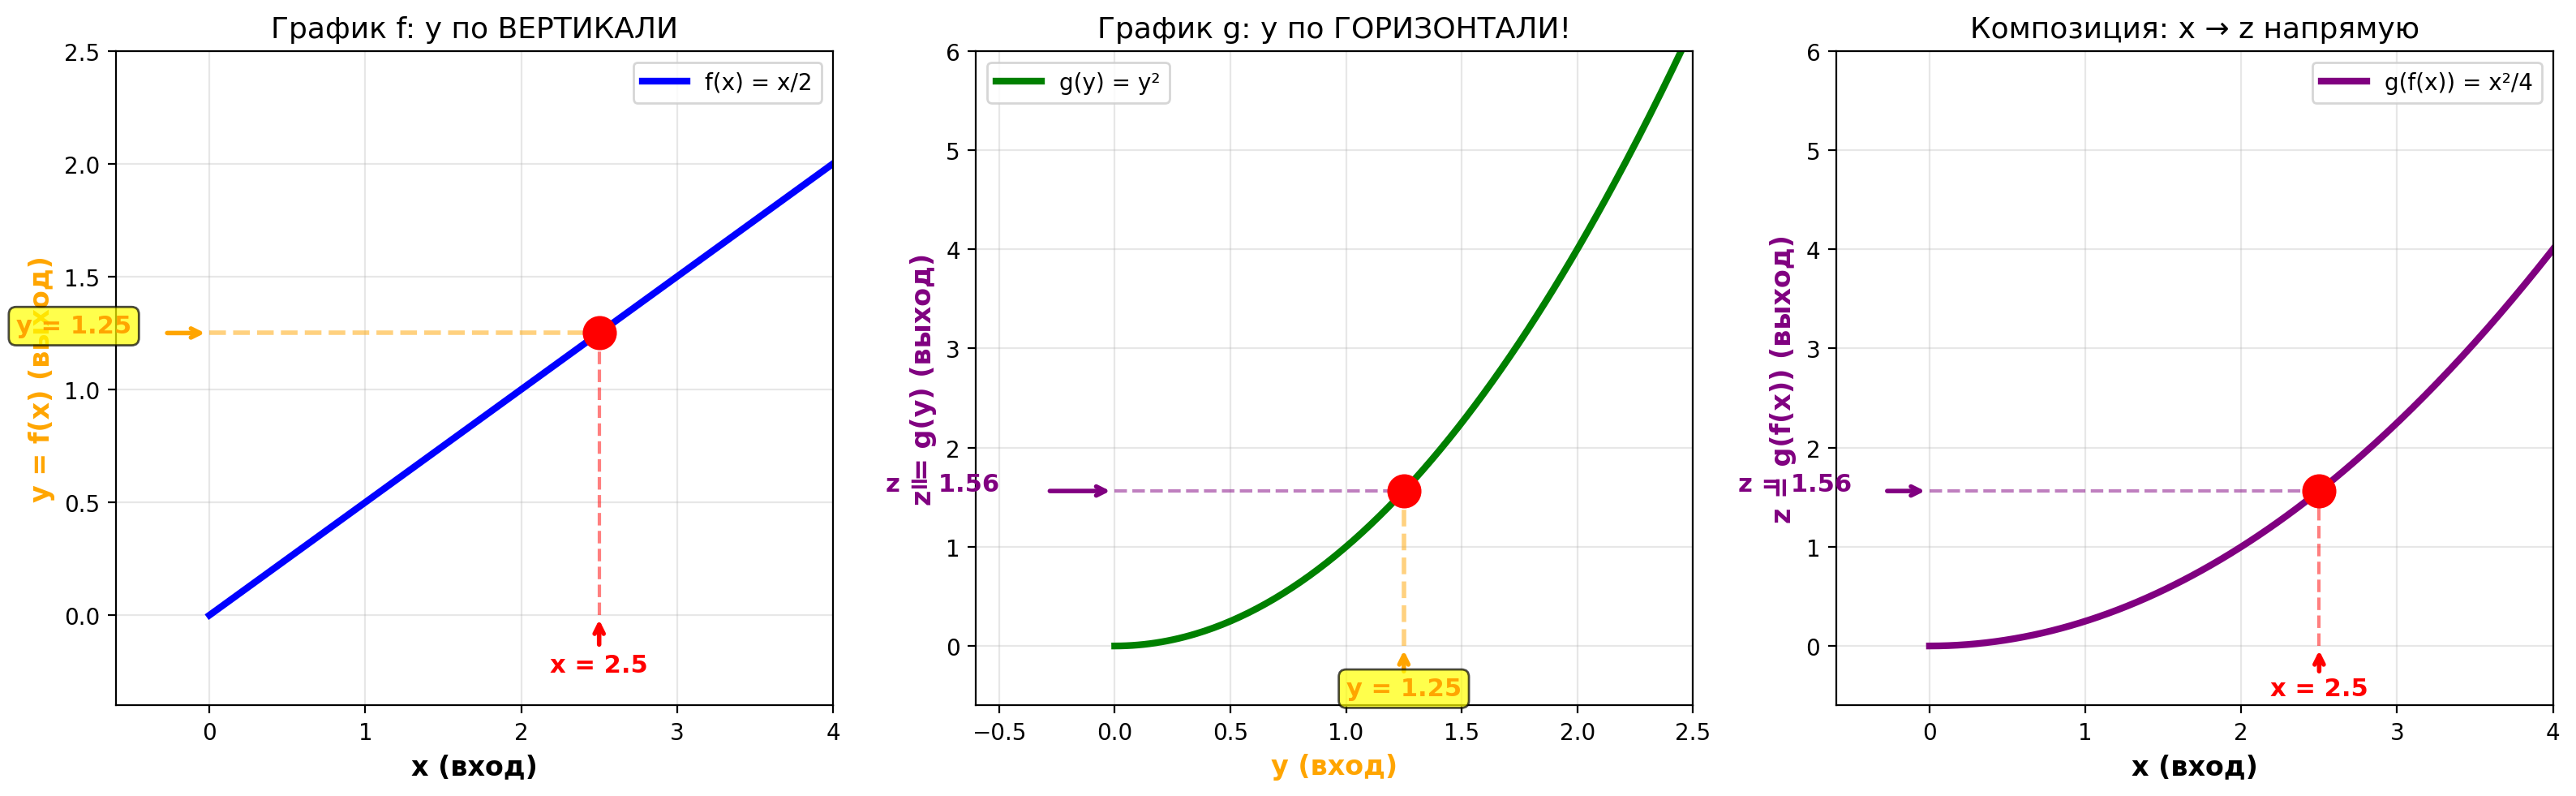

🔍 Ключевой геометрический момент:

ГРАФИК f:
  • x = 2.5 по ГОРИЗОНТАЛИ
  • y = f(2.5) = 1.25 по ВЕРТИКАЛИ ↑

ГРАФИК g:
  • y = 1.25 по ГОРИЗОНТАЛИ ← (то же значение!)
  • z = g(1.25) = 1.56 по ВЕРТИКАЛИ ↑

ГРАФИК КОМПОЗИЦИИ:
  • x = 2.5 по ГОРИЗОНТАЛИ
  • z = g(f(2.5)) = 1.56 по ВЕРТИКАЛИ ↑ (пропустили промежуточный y!)

Значение по ВЕРТИКАЛИ на графике f становится значением
по ГОРИЗОНТАЛИ на графике g — вот геометрический смысл композиции!


In [30]:
## Детальная визуализация: как y переходит из вертикали в горизонталь

# Покажем явно, как значение f(x) по вертикали становится аргументом g по горизонтали

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

x0 = 2.5
y0 = x0 / 2  # = 1.25
z0 = y0 ** 2  # ≈ 1.56

x = np.linspace(0, 4, 200)
y = np.linspace(0, 2.5, 200)

# График 1: f(x) = x/2
ax1 = axes[0]
ax1.plot(x, x/2, 'b-', linewidth=3, label='f(x) = x/2')
ax1.scatter([x0], [y0], color='red', s=200, zorder=5)

# Показываем стрелками
ax1.annotate('', xy=(x0, 0), xytext=(x0, -0.15),
             arrowprops=dict(arrowstyle='->', lw=2, color='red'))
ax1.text(x0, -0.25, f'x = {x0}', ha='center', fontsize=11, color='red', fontweight='bold')

ax1.annotate('', xy=(0, y0), xytext=(-0.3, y0),
             arrowprops=dict(arrowstyle='->', lw=2, color='orange'))
ax1.text(-0.5, y0, f'y = {y0:.2f}', ha='right', fontsize=11, color='orange', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax1.plot([x0, x0], [0, y0], 'r--', alpha=0.5)
ax1.plot([0, x0], [y0, y0], 'orange', linestyle='--', alpha=0.5, linewidth=2)

ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x (вход)', fontsize=12, fontweight='bold')
ax1.set_ylabel('y = f(x) (выход)', fontsize=12, fontweight='bold', color='orange')
ax1.set_title('График f: y по ВЕРТИКАЛИ', fontsize=13)
ax1.set_xlim(-0.6, 4)
ax1.set_ylim(-0.4, 2.5)
ax1.legend()

# График 2: g(y) = y^2
ax2 = axes[1]
ax2.plot(y, y**2, 'g-', linewidth=3, label='g(y) = y²')
ax2.scatter([y0], [z0], color='red', s=200, zorder=5)

# Показываем стрелками
ax2.annotate('', xy=(y0, 0), xytext=(y0, -0.3),
             arrowprops=dict(arrowstyle='->', lw=2, color='orange'))
ax2.text(y0, -0.5, f'y = {y0:.2f}', ha='center', fontsize=11, color='orange', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax2.annotate('', xy=(0, z0), xytext=(-0.3, z0),
             arrowprops=dict(arrowstyle='->', lw=2, color='purple'))
ax2.text(-0.5, z0, f'z = {z0:.2f}', ha='right', fontsize=11, color='purple', fontweight='bold')

ax2.plot([y0, y0], [0, z0], 'orange', linestyle='--', alpha=0.5, linewidth=2)
ax2.plot([0, y0], [z0, z0], 'purple', linestyle='--', alpha=0.5)

ax2.grid(True, alpha=0.3)
ax2.set_xlabel('y (вход)', fontsize=12, fontweight='bold', color='orange')
ax2.set_ylabel('z = g(y) (выход)', fontsize=12, fontweight='bold', color='purple')
ax2.set_title('График g: y по ГОРИЗОНТАЛИ!', fontsize=13)
ax2.set_xlim(-0.6, 2.5)
ax2.set_ylim(-0.6, 6)
ax2.legend()

# График 3: Композиция g(f(x))
ax3 = axes[2]
ax3.plot(x, (x/2)**2, 'purple', linewidth=3, label='g(f(x)) = x²/4')
ax3.scatter([x0], [z0], color='red', s=200, zorder=5)

ax3.annotate('', xy=(x0, 0), xytext=(x0, -0.3),
             arrowprops=dict(arrowstyle='->', lw=2, color='red'))
ax3.text(x0, -0.5, f'x = {x0}', ha='center', fontsize=11, color='red', fontweight='bold')

ax3.annotate('', xy=(0, z0), xytext=(-0.3, z0),
             arrowprops=dict(arrowstyle='->', lw=2, color='purple'))
ax3.text(-0.5, z0, f'z = {z0:.2f}', ha='right', fontsize=11, color='purple', fontweight='bold')

ax3.plot([x0, x0], [0, z0], 'r--', alpha=0.5)
ax3.plot([0, x0], [z0, z0], 'purple', linestyle='--', alpha=0.5)

ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x (вход)', fontsize=12, fontweight='bold')
ax3.set_ylabel('z = g(f(x)) (выход)', fontsize=12, fontweight='bold', color='purple')
ax3.set_title('Композиция: x → z напрямую', fontsize=13)
ax3.set_xlim(-0.6, 4)
ax3.set_ylim(-0.6, 6)
ax3.legend()

plt.tight_layout()
plt.show()

print("🔍 Ключевой геометрический момент:")
print("=" * 70)
print()
print("ГРАФИК f:")
print(f"  • x = {x0} по ГОРИЗОНТАЛИ")
print(f"  • y = f({x0}) = {y0:.2f} по ВЕРТИКАЛИ ↑")
print()
print("ГРАФИК g:")
print(f"  • y = {y0:.2f} по ГОРИЗОНТАЛИ ← (то же значение!)")
print(f"  • z = g({y0:.2f}) = {z0:.2f} по ВЕРТИКАЛИ ↑")
print()
print("ГРАФИК КОМПОЗИЦИИ:")
print(f"  • x = {x0} по ГОРИЗОНТАЛИ")
print(f"  • z = g(f({x0})) = {z0:.2f} по ВЕРТИКАЛИ ↑ (пропустили промежуточный y!)")
print()
print("=" * 70)
print("Значение по ВЕРТИКАЛИ на графике f становится значением")
print("по ГОРИЗОНТАЛИ на графике g — вот геометрический смысл композиции!")


## Применение к степенной функции

### Почему $\lim (f(x))^n = (\lim f(x))^n$?

**В нашем случае:**
- Внутренняя функция: $f(x)$
- Внешняя функция: $g(y) = y^n$ (возведение в степень $n$)

**Ключевой факт:** Функция $g(y) = y^n$ **непрерывна** для любого $y$ (при $n \in \mathbb{N}$)

**Применяем теорему:**
$$
\lim_{x \to a} (f(x))^n = \lim_{x \to a} g(f(x)) = g\left(\lim_{x \to a} f(x)\right) = \left(\lim_{x \to a} f(x)\right)^n
$$

### Конкретный пример

Вычислим $\lim_{x \to 2} (x + 1)^3$

**Способ 1 (обычный):**
$$
\lim_{x \to 2} (x + 1)^3 = (2 + 1)^3 = 3^3 = 27
$$

**Способ 2 (используя теорему):**
$$
\lim_{x \to 2} (x + 1)^3 = \left(\lim_{x \to 2} (x + 1)\right)^3 = 3^3 = 27
$$

Оба способа дают одинаковый результат! ✓


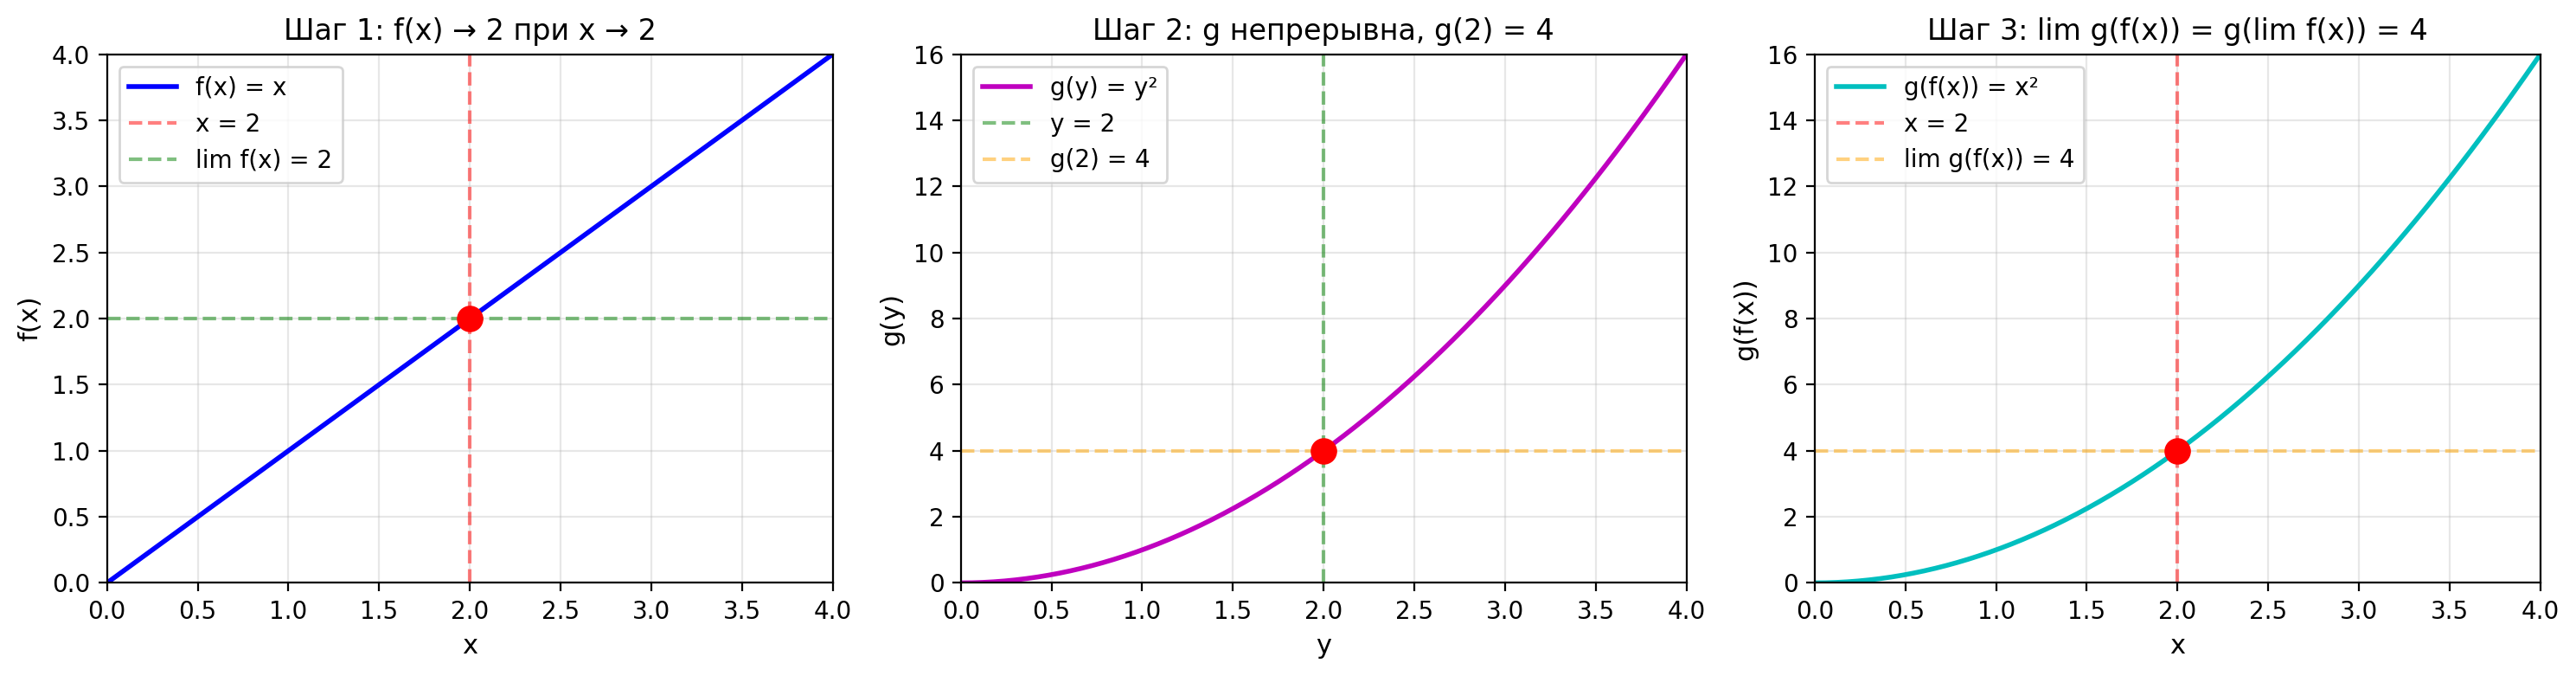

Ключевой момент:
────────────────────────────────────────────────────────────
• lim(x→2) f(x) = 2
• g непрерывна в точке 2
• Следовательно: lim(x→2) g(f(x)) = g(2) = 4

Предел можно "внести" внутрь непрерывной функции!


In [31]:
## Визуализация теоремы

# Покажем, как работает теорема на примере

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Пример: lim(x→2) (x)^2 = (lim(x→2) x)^2 = 2^2 = 4

x = np.linspace(0, 4, 200)
a = 2

# График 1: f(x) = x
ax1.plot(x, x, 'b-', linewidth=2, label='f(x) = x')
ax1.axvline(x=a, color='r', linestyle='--', alpha=0.5, label=f'x = {a}')
ax1.axhline(y=a, color='g', linestyle='--', alpha=0.5, label=f'lim f(x) = {a}')
ax1.scatter([a], [a], color='red', s=100, zorder=5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=11)
ax1.set_ylabel('f(x)', fontsize=11)
ax1.set_title('Шаг 1: f(x) → 2 при x → 2', fontsize=12)
ax1.legend()
ax1.set_xlim(0, 4)
ax1.set_ylim(0, 4)

# График 2: g(y) = y^2 (непрерывная функция)
y = np.linspace(0, 4, 200)
ax2.plot(y, y**2, 'm-', linewidth=2, label='g(y) = y²')
ax2.axvline(x=a, color='g', linestyle='--', alpha=0.5, label=f'y = {a}')
ax2.axhline(y=a**2, color='orange', linestyle='--', alpha=0.5, label=f'g({a}) = {a**2}')
ax2.scatter([a], [a**2], color='red', s=100, zorder=5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('y', fontsize=11)
ax2.set_ylabel('g(y)', fontsize=11)
ax2.set_title('Шаг 2: g непрерывна, g(2) = 4', fontsize=12)
ax2.legend()
ax2.set_xlim(0, 4)
ax2.set_ylim(0, 16)

# График 3: композиция g(f(x)) = (x)^2
ax3.plot(x, x**2, 'c-', linewidth=2, label='g(f(x)) = x²')
ax3.axvline(x=a, color='r', linestyle='--', alpha=0.5, label=f'x = {a}')
ax3.axhline(y=a**2, color='orange', linestyle='--', alpha=0.5, label=f'lim g(f(x)) = {a**2}')
ax3.scatter([a], [a**2], color='red', s=100, zorder=5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=11)
ax3.set_ylabel('g(f(x))', fontsize=11)
ax3.set_title('Шаг 3: lim g(f(x)) = g(lim f(x)) = 4', fontsize=12)
ax3.legend()
ax3.set_xlim(0, 4)
ax3.set_ylim(0, 16)

plt.tight_layout()
plt.show()

print("Ключевой момент:")
print("─" * 60)
print(f"• lim(x→{a}) f(x) = {a}")
print(f"• g непрерывна в точке {a}")
print(f"• Следовательно: lim(x→{a}) g(f(x)) = g({a}) = {a**2}")
print()
print("Предел можно \"внести\" внутрь непрерывной функции!")


## Другие примеры непрерывных функций

### Когда теорема работает ✅

Теорему можно применять к любым **непрерывным** функциям!

**Примеры:**

1. **Степень:** $\lim_{x \to a} (f(x))^n = \left(\lim_{x \to a} f(x)\right)^n$

2. **Корень:** $\lim_{x \to a} \sqrt[n]{f(x)} = \sqrt[n]{\lim_{x \to a} f(x)}$ (если предел $\geq 0$ для четных $n$)

3. **Экспонента:** $\lim_{x \to a} e^{f(x)} = e^{\lim_{x \to a} f(x)}$

4. **Логарифм:** $\lim_{x \to a} \ln(f(x)) = \ln\left(\lim_{x \to a} f(x)\right)$ (если предел $> 0$)

5. **Тригонометрия:** $\lim_{x \to a} \sin(f(x)) = \sin\left(\lim_{x \to a} f(x)\right)$

6. **Модуль:** $\lim_{x \to a} |f(x)| = \left|\lim_{x \to a} f(x)\right|$

---

### Примеры вычислений

**Пример 1:** $\lim_{x \to 0} e^{2x} = e^{\lim_{x \to 0} 2x} = e^0 = 1$

**Пример 2:** $\lim_{x \to 1} \ln(x^2 + x) = \ln\left(\lim_{x \to 1} (x^2 + x)\right) = \ln(2)$

**Пример 3:** $\lim_{x \to 4} \sqrt{x + 5} = \sqrt{\lim_{x \to 4} (x + 5)} = \sqrt{9} = 3$

**Пример 4:** $\lim_{x \to 0} \sin(3x) = \sin\left(\lim_{x \to 0} 3x\right) = \sin(0) = 0$


## ⚠️ Контрпример: когда теорема НЕ работает

### Разрывная функция $g(y) = \frac{1}{y}$

Функция $g(y) = \frac{1}{y}$ **НЕ непрерывна** в точке $y = 0$ (там разрыв!)

**Неправильное применение:**

Пусть $f(x) = x$ и $\lim_{x \to 0} f(x) = 0$

Если бы теорема работала:
$$
\lim_{x \to 0} \frac{1}{f(x)} \stackrel{?}{=} \frac{1}{\lim_{x \to 0} f(x)} = \frac{1}{0} \text{ — не определено!}
$$

**На самом деле:**
$$
\lim_{x \to 0} \frac{1}{x} = \infty \text{ (бесконечно большая функция!)}
$$

Это совсем не то же самое, что $\frac{1}{0}$!

---

### Визуализация контрпримера

Покажем, почему разрывность мешает:

**Для непрерывной $g$ (например, $y^2$):**
- $f(x) \to 0$ → $g(f(x)) \to g(0) = 0$ ✓

**Для разрывной $g$ (например, $1/y$):**
- $f(x) \to 0$ → $g(f(x)) = 1/f(x) \to \infty$ ✗ 
- НЕ равно $g(0)$, которое вообще не определено!

**Вывод:** Непрерывность $g$ в точке предела — критически важное условие!


## 📝 Резюме

### Главное правило

$$
\boxed{\lim_{x \to a} g(f(x)) = g\left(\lim_{x \to a} f(x)\right) \quad \text{если } g \text{ непрерывна}}
$$

### Когда можно "вносить" предел в функцию?

**Необходимые условия:**

1. ✅ Предел $\lim_{x \to a} f(x) = L$ существует
2. ✅ Функция $g$ **непрерывна** в точке $L$

**Если оба условия выполнены** → можно вносить предел!

---

### Практические примеры

**Работает для непрерывных функций:**

| Функция | Пример | Результат |
|---------|--------|-----------|
| $y^n$ | $\lim (x+1)^2 = (\lim(x+1))^2$ | ✅ |
| $e^y$ | $\lim e^{2x} = e^{\lim 2x}$ | ✅ |
| $\ln(y)$ | $\lim \ln(x) = \ln(\lim x)$ | ✅ (если $\lim x > 0$) |
| $\sin(y)$ | $\lim \sin(x) = \sin(\lim x)$ | ✅ |
| $\sqrt{y}$ | $\lim \sqrt{x} = \sqrt{\lim x}$ | ✅ (если $\lim x \geq 0$) |

**НЕ работает для разрывных:**

| Функция | Пример | Проблема |
|---------|--------|----------|
| $\frac{1}{y}$ в точке $y=0$ | $\lim \frac{1}{x} \neq \frac{1}{\lim x}$ | ❌ Разрыв в 0! |

---

### 💡 Интуитивное понимание

**Почему нужна непрерывность?**

Если $g$ непрерывна в точке $L$, то:
- Нет "скачков" в точке $L$
- Малые изменения аргумента → малые изменения значения
- Когда $f(x) \to L$, автоматически $g(f(x)) \to g(L)$

**Если $g$ разрывна:**
- Есть "скачок" в точке $L$
- Предел может быть совсем не таким, как $g(L)$
- Теорема ломается!


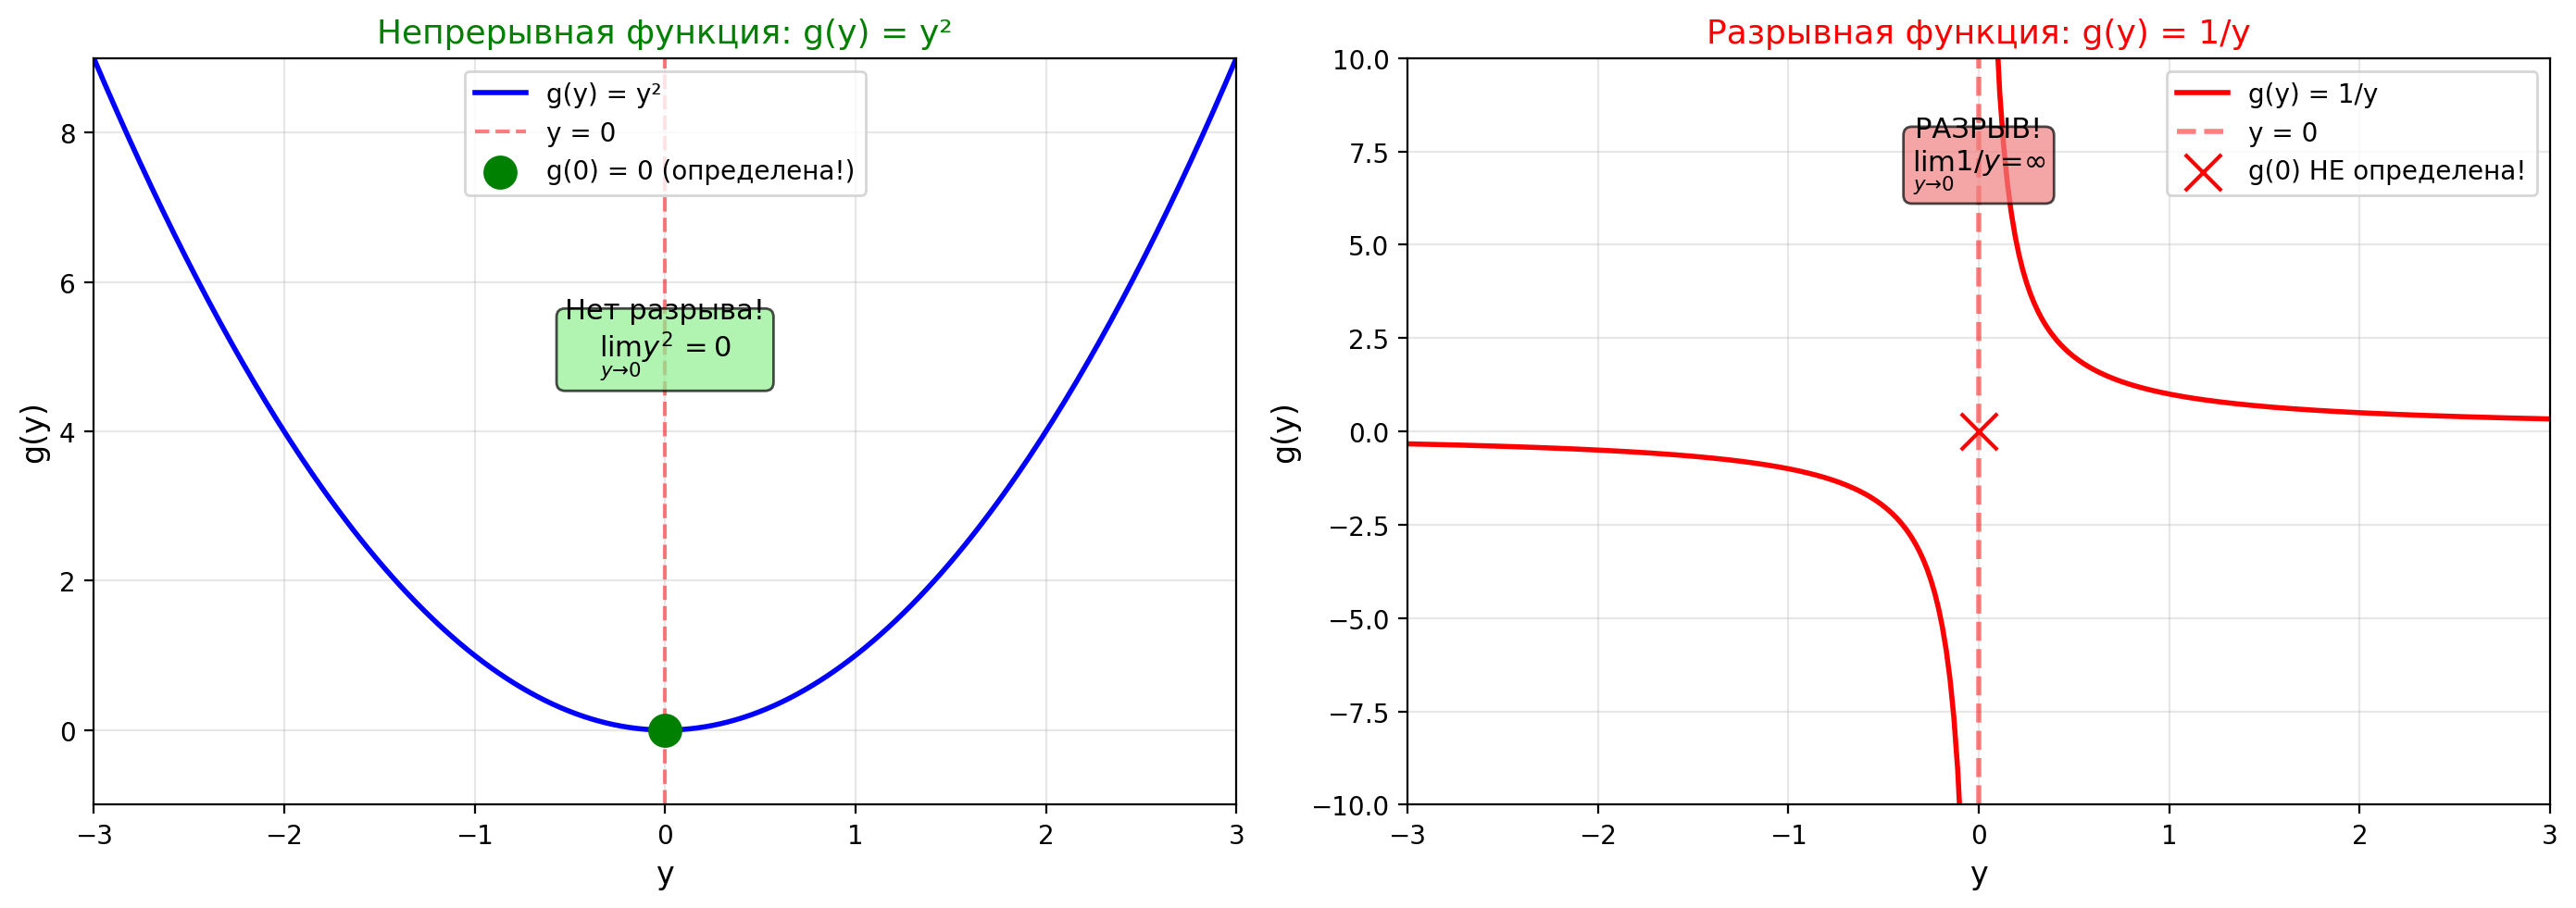

Сравнение:
Непрерывная g(y) = y²:
  • Определена в точке y = 0: g(0) = 0 ✓
  • lim(y→0) y² = 0 = g(0) ✓
  • Предел можно вносить! ✓

Разрывная g(y) = 1/y:
  • НЕ определена в точке y = 0: g(0) = ? ✗
  • lim(y→0) 1/y = ∞ ≠ g(0) ✗
  • Предел вносить НЕЛЬЗЯ! ✗


In [32]:
# Визуализация: непрерывная vs разрывная функция

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-3, 3, 300)
x_pos = x[x > 0.01]
x_neg = x[x < -0.01]

# График 1: Непрерывная функция g(y) = y^2
ax1.plot(x, x**2, 'b-', linewidth=2, label='g(y) = y²')
ax1.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='y = 0')
ax1.scatter([0], [0], color='green', s=150, zorder=5, label='g(0) = 0 (определена!)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-1, 9)
ax1.set_xlabel('y', fontsize=12)
ax1.set_ylabel('g(y)', fontsize=12)
ax1.set_title('Непрерывная функция: g(y) = y²', fontsize=13, color='green')
ax1.legend()
ax1.text(0, 5, 'Нет разрыва!\n$\\lim_{y \\to 0} y^2 = 0$', 
         ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# График 2: Разрывная функция g(y) = 1/y
ax2.plot(x_neg, 1/x_neg, 'r-', linewidth=2, label='g(y) = 1/y')
ax2.plot(x_pos, 1/x_pos, 'r-', linewidth=2)
ax2.axvline(x=0, color='r', linestyle='--', alpha=0.5, linewidth=2, label='y = 0')
ax2.scatter([0], [0], color='red', marker='x', s=200, zorder=5, label='g(0) НЕ определена!')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-10, 10)
ax2.set_xlabel('y', fontsize=12)
ax2.set_ylabel('g(y)', fontsize=12)
ax2.set_title('Разрывная функция: g(y) = 1/y', fontsize=13, color='red')
ax2.legend()
ax2.text(0, 7, 'РАЗРЫВ!\n$\\lim_{y \\to 0} 1/y = \\infty$', 
         ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

print("Сравнение:")
print("=" * 70)
print("Непрерывная g(y) = y²:")
print("  • Определена в точке y = 0: g(0) = 0 ✓")
print("  • lim(y→0) y² = 0 = g(0) ✓")
print("  • Предел можно вносить! ✓")
print()
print("Разрывная g(y) = 1/y:")
print("  • НЕ определена в точке y = 0: g(0) = ? ✗")
print("  • lim(y→0) 1/y = ∞ ≠ g(0) ✗")
print("  • Предел вносить НЕЛЬЗЯ! ✗")
print("=" * 70)
